In [35]:
from ase.calculators.vasp import VaspChargeDensity
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc('font', size=14)

In [2]:
upden = VaspChargeDensity(filename="perovskite_2/up.CHGCAR")
dnden = VaspChargeDensity(filename="perovskite_2/dn.CHGCAR")

In [3]:
actualpos = upden.atoms[0].get_positions()[-1,2]
maxpos = upden.atoms[0].cell[2,2]
level = int(np.round(actualpos/maxpos * upden.chg[-1].shape[2]))
diff = (upden.chg[-1]- dnden.chg[-1])[:, :, level]
dx = upden.atoms[0].cell[0,0] / upden.chg[-1].shape[0]
dy = upden.atoms[0].cell[1,1] / upden.chg[-1].shape[1]

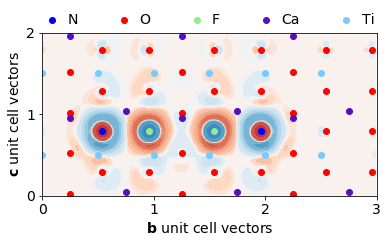

In [51]:
f = plt.figure(figsize=(6, 3))

nonexp = np.percentile(np.log(abs(diff[43, :])), np.linspace(30, 100, 10))
levels = np.exp(nonexp)
levels = np.unique(np.hstack((-levels[::-1], levels)))
cm = plt.cm.get_cmap('RdBu')
plt.contourf(diff, zorder=-1, levels=levels, colors=[cm(_) for _ in np.linspace(0.1, 0.9, len(levels))])

# elements
elementcolors={8: '#fe0300', 7: 'blue', 9: 'lightgreen', 20:'#5a0fbd',22:'#78caff'}
elementnames={8: 'O', 7: 'N', 9: 'F', 20:'Ca',22:'Ti'}
for element in (7, 8, 9, 20, 22):
    pos = upden.atoms[0].get_positions()
    pos = pos[(abs(pos[:, 2]-actualpos)< 1.2) & (upden.atoms[0].numbers == element)]
    plt.scatter(pos[:, 1]/dy, pos[:, 0]/dx, color=elementcolors[element], label=elementnames[element])

plt.xlim(0, diff.shape[1])
plt.ylim(0, diff.shape[0])
plt.xticks((0, 80, 160, 240), (0, 1, 2, 3))
plt.yticks((0, 54, 108), (0, 1, 2))
plt.xlabel(r'$\mathbf{b}$ unit cell vectors')
plt.ylabel(r'$\mathbf{c}$ unit cell vectors')

plt.legend(ncol=5,loc='upper left', bbox_to_anchor=(-0.05, 0, -0.05, 1.2), frameon=False, columnspacing=2.3, handletextpad=0.1)
plt.savefig('slice.pdf', bbox_inches='tight')